In [1]:

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
%matplotlib inline

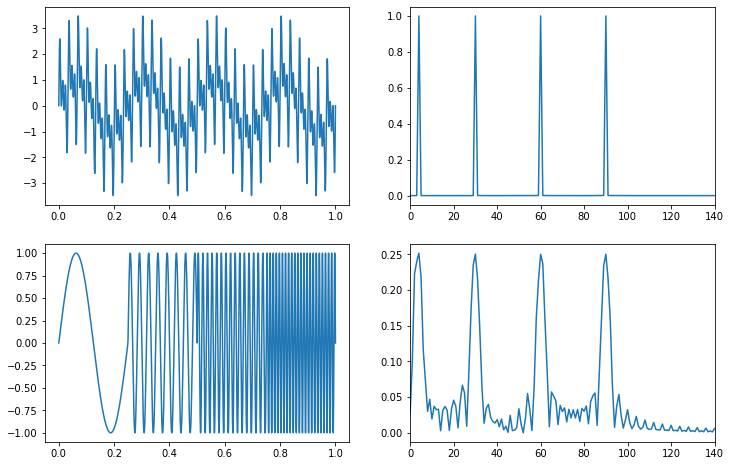

In [14]:
# Fourier transform introduction
t_n = 1
N = pow(10,5)
T = t_n / N
f_s = 1 / T

xa = np.linspace(0,t_n,N)
xb = np.linspace(0, t_n/4, N//4)

frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)

composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])

f_values_1, fft_values_1 = np.linspace(0.0, 1.0/(2.0*T), N//2),fft(composite_signal1)
f_values_2, fft_values_2 = np.linspace(0.0, 1.0/(2.0*T), N//2),fft(composite_signal2)
# print(len(composite_signal1))
# print(len(fft_values_1))

fig, axarr = plt.subplots(2,2,figsize=(12,8))
axarr[0,0].plot(xa,composite_signal1)
axarr[1,0].plot(xa,composite_signal2)
axarr[0,1].plot(f_values_1,2.0/N * np.abs(fft_values_1[:N//2]))
axarr[0,1].set_xlim([0,140])
axarr[1,1].plot(f_values_2,2.0/N * np.abs(fft_values_2[:N//2]))
axarr[1,1].set_xlim([0,140])


plt.show()

In [15]:
# Different types of mother wavelets
import pywt
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


In [ ]:
# A wavelet must just have two conditions to satisfy:
# 1. finite energy
# 2. zero mean

/home/pp-dev/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


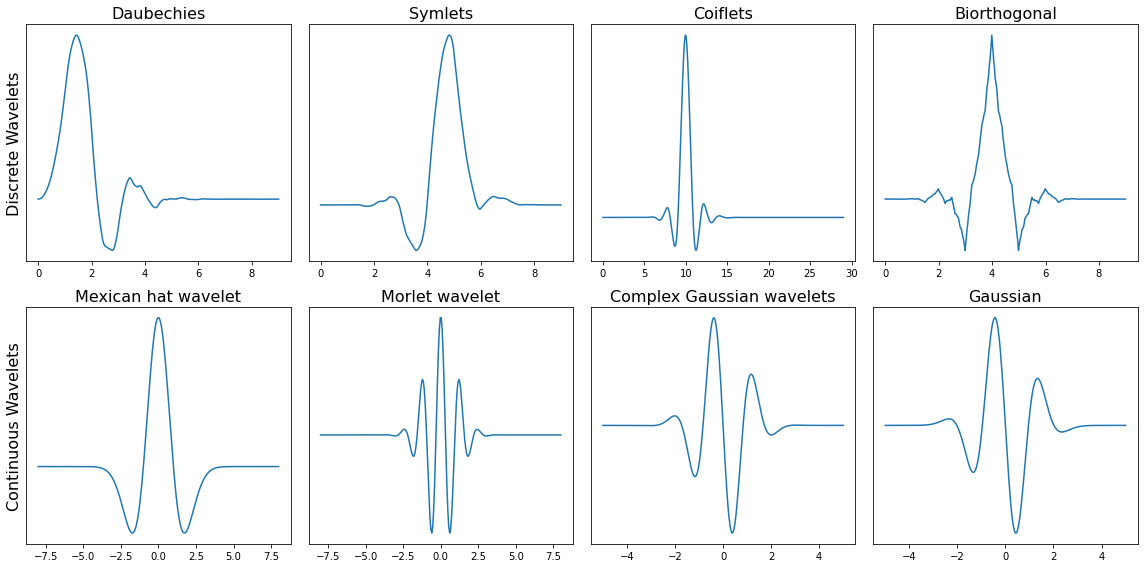

In [18]:
discrete_wavelets = ['db5','sym5','coif5','bior2.4']
cont_wavelets = ['mexh','morl','cgau5','gaus5']

list_list_wavelets  = [discrete_wavelets,cont_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(2,4,figsize=(16,8))
for ii,list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal  = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function,x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no,col_no].set_ylabel("Discrete Wavelets",fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no,col_no].set_ylabel("Continuous Wavelets",fontsize =16)
        axarr[row_no,col_no].set_title(f"{family_name}",fontsize=16)
        axarr[row_no,col_no].plot(x_values,wavelet_function)
        axarr[row_no,col_no].set_yticks([])
        axarr[row_no,col_no].set_yticklabels([])
        
plt.tight_layout()
plt.show()
        
        
